# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings



In [3]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
import os
import pandas as pd
import glob

# Define the folder path where Parquet files are stored
folder_path = r"C:\Users\Kavya\taxi\trip_records"

# Get the list of all 12 Parquet files (for months in 2023)
file_list = sorted(glob.glob(os.path.join(folder_path, "2023-*.parquet")))

# Initialize an empty dataframe for the final combined sampled data
df_final = pd.DataFrame()

# Process each file separately to avoid memory overload
for file_path in file_list:
    try:
        print(f"Processing: {file_path}")  # Track progress

        # Read the current month’s Parquet file
        df = pd.read_parquet(file_path, engine="pyarrow")  # Use "fastparquet" if needed

        # Extract date and hour from the pickup datetime column
        df["pickup_date"] = df["tpep_pickup_datetime"].dt.date
        df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

        # Initialize an empty dataframe for sampled data of the current file
        sampled_data = pd.DataFrame()

        # Iterate through unique dates
        for date in df["pickup_date"].unique():
            daily_data = df[df["pickup_date"] == date]  # Filter data for this date

            # Iterate through 24 hours of this date
            for hour in range(24):
                hour_data = daily_data[daily_data["pickup_hour"] == hour]  # Filter by hour

                # Sample 5% of the trips for this hour (if there's data)
                if not hour_data.empty:
                    sampled_hour_data = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sampled_hour_data])

        # Append the sampled data of the current month to the final dataframe
        df_final = pd.concat([df_final, sampled_data])

    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Save the final sampled dataset
output_path = os.path.join(folder_path, "sampled_2023.parquet")
df_final.to_parquet(output_path, engine="pyarrow")

print(f"Sampling complete! File saved at: {output_path}")


Processing: C:\Users\Kavya\taxi\trip_records\2023-1.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-10.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-11.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-12.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-2.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-3.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-4.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-5.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-6.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-7.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-8.parquet
Processing: C:\Users\Kavya\taxi\trip_records\2023-9.parquet
Sampling complete! File saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [7]:
# Load the new data file

import pandas as pd
import os

# Define file path
folder_path = r"C:\Users\Kavya\taxi\trip_records"
cleaned_file_path = os.path.join(folder_path, "sampled_2023.parquet")

# Load the cleaned data
df = pd.read_parquet(cleaned_file_path)

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2705104
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

In [10]:
# df.head()
print(df.head())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
428    

In [8]:
# df.info()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2705104
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Fix the index and drop any columns that are not needed
import pandas as pd
import os

# Define the file path
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023.parquet")

# Load the dataset
df = pd.read_parquet(file_path)

# Drop the unnecessary columns
columns_to_drop = ["store_and_fwd_flag"]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Save the cleaned dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df.to_parquet(cleaned_file_path)

print(f"Cleaned file saved at: {cleaned_file_path}")



Cleaned file saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_cleaned.parquet


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [14]:
# Combine the two airport fee columns

import pandas as pd
import os

# Define the file path
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")

# Load the dataset
df = pd.read_parquet(file_path)

# Identify columns with "airport_fee"
airport_fee_columns = [col for col in df.columns if "airport_fee" in col.lower()]
print(f"Airport Fee Columns Found: {airport_fee_columns}")

if len(airport_fee_columns) == 2:
    # Check if they are identical
    if df[airport_fee_columns[0]].equals(df[airport_fee_columns[1]]):
        print("Both airport_fee columns are identical. Dropping one.")
        df.drop(columns=[airport_fee_columns[1]], inplace=True)
    else:
        print("Merging non-identical airport_fee columns by filling missing values.")
        df["airport_fee"] = df[airport_fee_columns[0]].fillna(df[airport_fee_columns[1]])
        df.drop(columns=airport_fee_columns, inplace=True, errors='ignore')

# Save the cleaned dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df.to_parquet(cleaned_file_path)

print(f"Cleaned file saved at: {cleaned_file_path}")


Airport Fee Columns Found: ['airport_fee', 'Airport_fee']
Merging non-identical airport_fee columns by filling missing values.
Cleaned file saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_cleaned.parquet


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [17]:
# check where values of fare amount are negative

import pandas as pd
import os

# Define the file path
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")

# Load the dataset
df = pd.read_parquet(file_path)

print(df.columns)
# List of monetary columns to check
monetary_columns = ["fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge"]

# Identify columns with negative values
negative_values = df[monetary_columns].lt(0).sum()
print("Negative Values in Columns:\n", negative_values[negative_values > 0])

# Fix negative values by taking absolute values
df[monetary_columns] = df[monetary_columns].abs()

# Save the cleaned dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df.to_parquet(cleaned_file_path)

print(f"Cleaned file saved at: {cleaned_file_path}")


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_date', 'pickup_hour'],
      dtype='object')
Negative Values in Columns:
 extra                     3
mta_tax                  73
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
dtype: int64
Cleaned file saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_cleaned.parquet


In [18]:
df = pd.read_parquet(file_path)

# Filter rows with negative fare amounts
negative_fares = df[df["fare_amount"] < 0]

# Group by RatecodeID and count occurrences
ratecode_analysis = negative_fares["RatecodeID"].value_counts()

# Display the analysis
print("RatecodeID Distribution for Negative Fare Amounts:\n", ratecode_analysis)


RatecodeID Distribution for Negative Fare Amounts:
 Series([], Name: count, dtype: int64)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [19]:
# Find the proportion of missing values in each column

import pandas as pd
import os

# Define the file path
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")

# Load the dataset
df = pd.read_parquet(file_path)

# Calculate the proportion of missing values in each column
missing_proportion = df.isnull().sum() / len(df) * 100

# Display the results
print("Proportion of Missing Values (%):\n", missing_proportion)


Proportion of Missing Values (%):
 VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420903
trip_distance            0.000000
RatecodeID               3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420903
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [20]:
import pandas as pd
import os

# Define the file path
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")

# Load the dataset
df = pd.read_parquet(file_path)

# Check the percentage of missing values in passenger_count
missing_passengers = df["passenger_count"].isnull().sum() / len(df) * 100
print(f"Missing Values in passenger_count: {missing_passengers:.2f}%")

# Handling missing values
if missing_passengers > 5:  # If >5% missing, use median; otherwise, use mode
    df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].median()[0])
    print("Filled missing passenger_count with median.")
else:
    df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].mode()[0])
    print("Filled missing passenger_count with mode (most common value).")

# Save the cleaned dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df.to_parquet(cleaned_file_path)

print(f"Cleaned file saved at: {cleaned_file_path}")


Missing Values in passenger_count: 3.42%
Filled missing passenger_count with mode (most common value).
Cleaned file saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_cleaned.parquet


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [21]:
# Fix missing values in 'RatecodeID'
import pandas as pd
import os

# Define the file path
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")

# Load the dataset
df = pd.read_parquet(file_path)

# Check the percentage of missing values in RatecodeID
missing_ratecode = df["RatecodeID"].isnull().sum() / len(df) * 100
print(f"Missing Values in RatecodeID: {missing_ratecode:.2f}%")

# Handling missing values
if missing_ratecode > 5:  # If more than 5% missing, fill with median
    df["RatecodeID"] = df["RatecodeID"].fillna(df["RatecodeID"].median())
    print("Filled missing RatecodeID with median.")
else:
    df["RatecodeID"] = df["RatecodeID"].fillna(df["RatecodeID"].mode()[0])
    print("Filled missing RatecodeID with mode (most common value).")

# Save the cleaned dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df.to_parquet(cleaned_file_path)

print(f"Cleaned file saved at: {cleaned_file_path}")


Missing Values in RatecodeID: 3.42%
Filled missing RatecodeID with mode (most common value).
Cleaned file saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_cleaned.parquet


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [22]:
# Handle any remaining missing values

import os
import pandas as pd

# Define folder and file path
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")

# Load the dataset
df = pd.read_parquet(file_path)

# Fill missing values in congestion_surcharge with 0
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(0)

# Save the updated dataset
output_file_path = os.path.join(folder_path, "sampled_2023_cleaned_imputed.parquet")
df.to_parquet(output_file_path, index=False)

print(f"Updated file saved at: {output_file_path}")


Updated file saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_cleaned_imputed.parquet


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

Summary Statistics:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.896400e+06  1.896400e+06   
mean      1.356585e+00   3.858293e+00  1.612981e+00  1.652814e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.00000

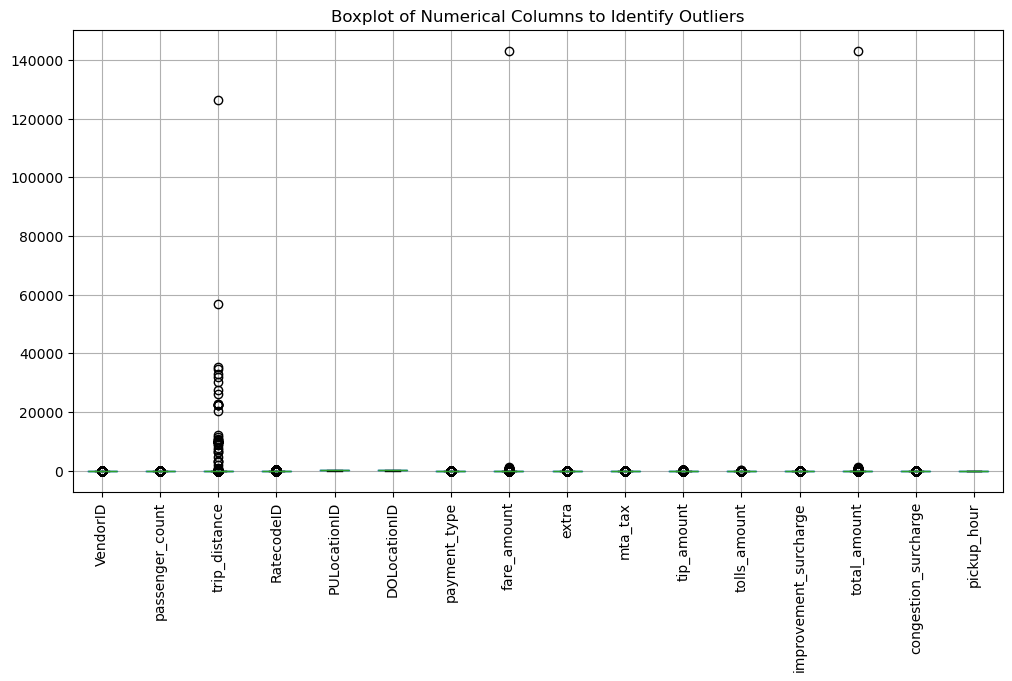

In [26]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df = pd.read_parquet(file_path)

# Display basic statistics
print("Summary Statistics:\n", df.describe())

# Check for NaN values
print("\nMissing Values in Dataset:\n", df.isnull().sum())

# Function to detect outliers using IQR
def detect_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outliers

# Identify outliers for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

outliers_dict = {}
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        outliers_dict[col] = len(outliers)
        
print("\nOutliers Count per Column (Using IQR Method):\n", outliers_dict)

# Plot boxplots to visualize outliers
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Columns to Identify Outliers")
plt.show()



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [27]:
import pandas as pd
import os

# Load the dataset
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df = pd.read_parquet(file_path)

# Remove entries where passenger_count > 6
df = df[df['passenger_count'] <= 6]

# Remove entries where trip_distance is nearly 0 and fare_amount > 300
df = df[~((df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300))]

# Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff locations differ
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# Remove entries where trip_distance > 250 miles
df = df[df['trip_distance'] <= 250]

# Remove entries where payment_type is 0
df = df[df['payment_type'] != 0]

# Remove entries with negative fare_amount, total_amount, or trip_distance
df = df[(df['fare_amount'] >= 0) & (df['total_amount'] >= 0) & (df['trip_distance'] >= 0)]

# Save the cleaned dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_final_cleaned.parquet")
df.to_parquet(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_final_cleaned.parquet


In [28]:
import pandas as pd
import os

# Load the dataset
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_final_cleaned.parquet")
df = pd.read_parquet(file_path)

# Standardize column names to snake_case
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Remove entries where passenger_count > 6
df = df[df['passenger_count'] <= 6]

# Remove entries where trip_distance is nearly 0 and fare_amount > 300
df = df[~((df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300))]

# Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff locations differ
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['pulocationid'] != df['dolocationid']))]

# Remove entries where trip_distance > 250 miles
df = df[df['trip_distance'] <= 250]

# Remove entries where payment_type is 0
df = df[df['payment_type'] != 0]

# Remove entries with negative fare_amount, total_amount, or trip_distance
df = df[(df['fare_amount'] >= 0) & (df['total_amount'] >= 0) & (df['trip_distance'] >= 0)]

# Convert datetime columns to proper format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract additional time-related features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Convert payment_type to categorical
df['payment_type'] = df['payment_type'].astype('category')

# Round trip_distance to two decimal places
df['trip_distance'] = df['trip_distance'].round(2)

# Ensure passenger_count is integer
df['passenger_count'] = df['passenger_count'].astype(int)

# Save the cleaned and standardized dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_final_cleaned.parquet")
df.to_parquet(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_final_cleaned.parquet


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [29]:
df.columns.tolist()

['vendorid',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'pickup_day_of_week',
 'pickup_month']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:

Numerical Variables:
passenger_count (Integer)

trip_distance (Float)

pickup_hour (Integer)

trip_duration (Float)

Monetary Parameters (All Numerical)

fare_amount

extra

mta_tax

tip_amount

tolls_amount

improvement_surcharge

total_amount

congestion_surcharge

airport_fee

Categorical Variables:
VendorID

RatecodeID

PULocationID

DOLocationID

payment_type

pickup_day_of_week

pickup_month

Datetime Variables:
tpep_pickup_datetime

tpep_dropoff_datetime

The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`


All these parameters represent monetary values, so they belong in the numerical category. However, I noticed that congestion_surcharge and airport_fee are stored as objects, meaning they might contain non-numeric values (e.g., missing values or categorical labels).

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

1. Pickups by Hour
The busiest hours are between 12 PM and 6 PM, peaking at 5 PM (36,214 pickups).

Pickups gradually decrease after 8 PM, reaching the lowest counts between 3 AM and 5 AM.

2. Pickups by Day of the Week
The distribution is relatively balanced, with Tuesday having the highest pickups (85,316) and Monday the lowest (73,121).

There is no extreme difference between weekdays and weekends.

3. Pickups by Month
The data is concentrated in January (152,085 pickups), October (174,252 pickups), November (165,133 pickups), and December (31,800 pickups).

Some months (February to July) have missing or very low data, which may indicate incomplete records.

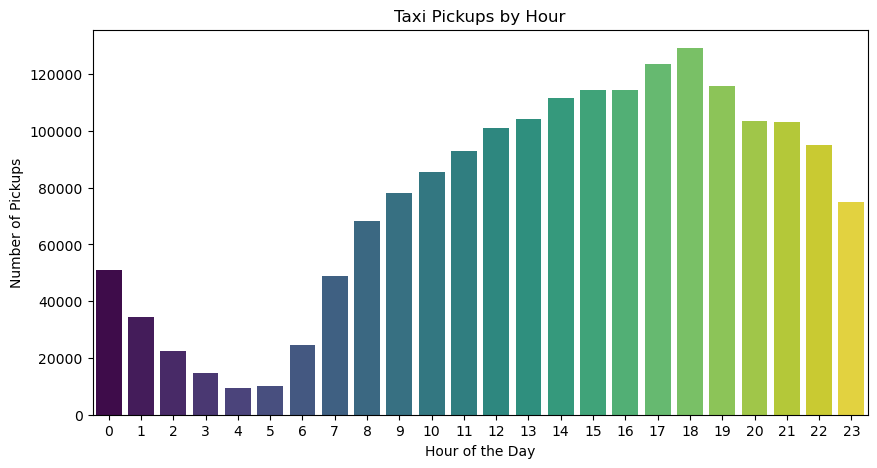

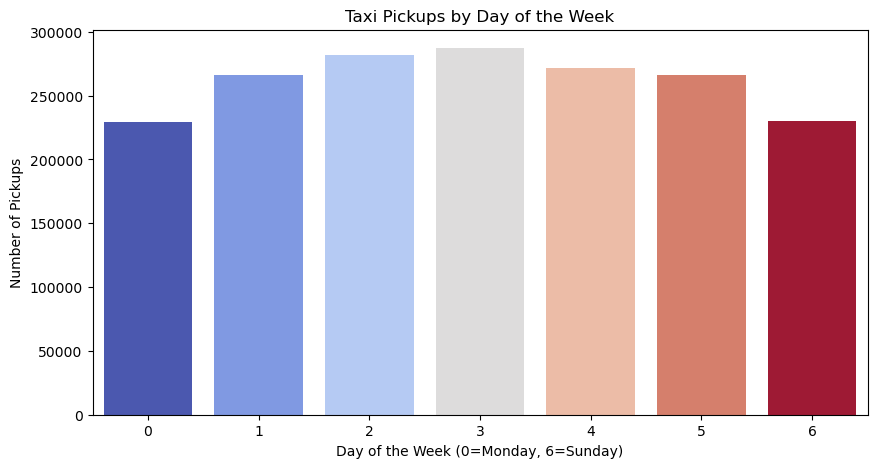

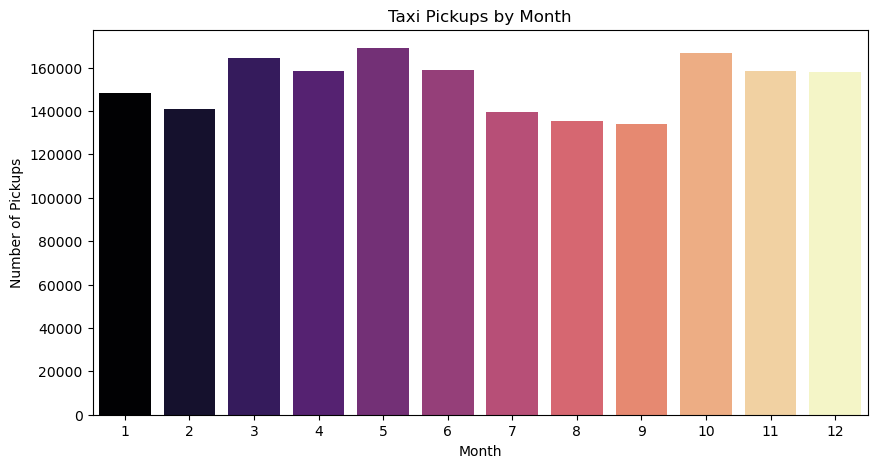

Cleaned dataset saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_final_cleaned.parquet


In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df = pd.read_parquet(file_path)

# Standardize column names to snake_case
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Remove entries where passenger_count > 6
df = df[df['passenger_count'] <= 6]

# Remove entries where trip_distance is nearly 0 and fare_amount > 300
df = df[~((df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300))]

# Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff locations differ
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['pulocationid'] != df['dolocationid']))]

# Remove entries where trip_distance > 250 miles
df = df[df['trip_distance'] <= 250]

# Remove entries where payment_type is 0
df = df[df['payment_type'] != 0]

# Remove entries with negative fare_amount, total_amount, or trip_distance
df = df[(df['fare_amount'] >= 0) & (df['total_amount'] >= 0) & (df['trip_distance'] >= 0)]

# Convert datetime columns to proper format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract additional time-related features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Convert payment_type to categorical
df['payment_type'] = df['payment_type'].astype('category')

# Round trip_distance to two decimal places
df['trip_distance'] = df['trip_distance'].round(2)

# Ensure passenger_count is integer
df['passenger_count'] = df['passenger_count'].astype(int)

# Plot pickup distribution by hour
plt.figure(figsize=(10,5))
sns.countplot(x=df['pickup_hour'], hue=df['pickup_hour'], palette='viridis', legend=False)
plt.title('Taxi Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

# Plot pickup distribution by day of the week
plt.figure(figsize=(10,5))
sns.countplot(x=df['pickup_day_of_week'], hue=df['pickup_day_of_week'], palette='coolwarm', legend=False)
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.show()

# Plot pickup distribution by month
plt.figure(figsize=(10,5))
sns.countplot(x=df['pickup_month'], hue=df['pickup_month'], palette='magma', legend=False)
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

# Save the cleaned and standardized dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_final_cleaned.parquet")
df.to_parquet(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


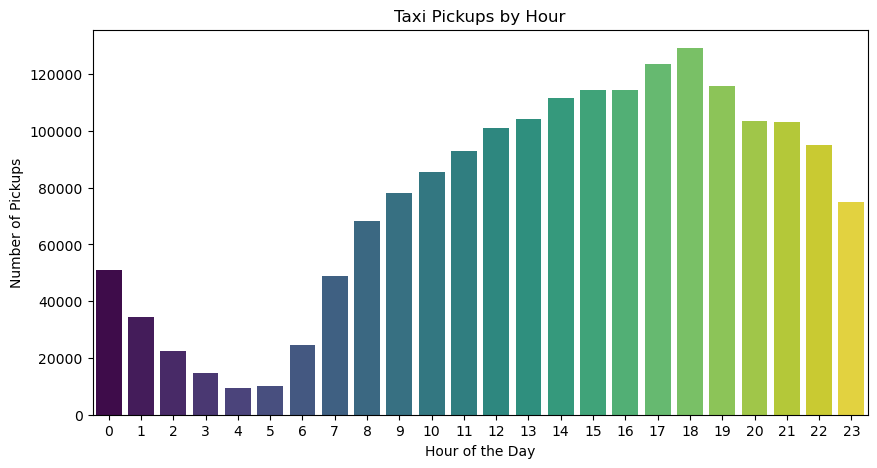

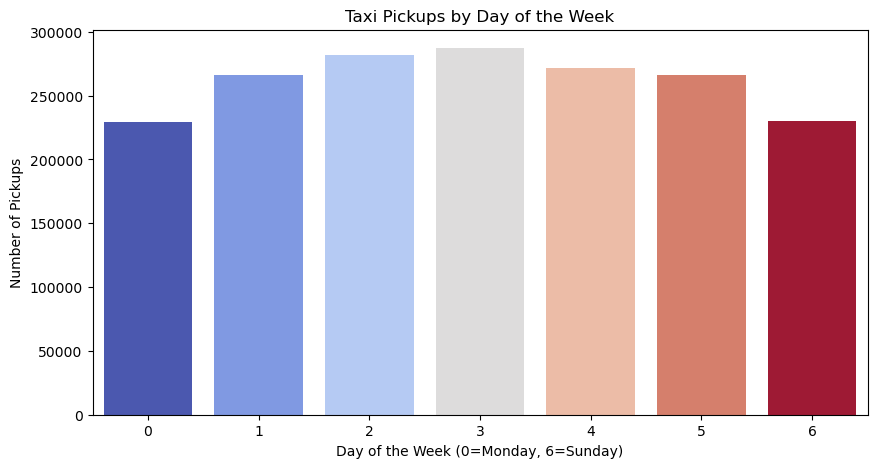

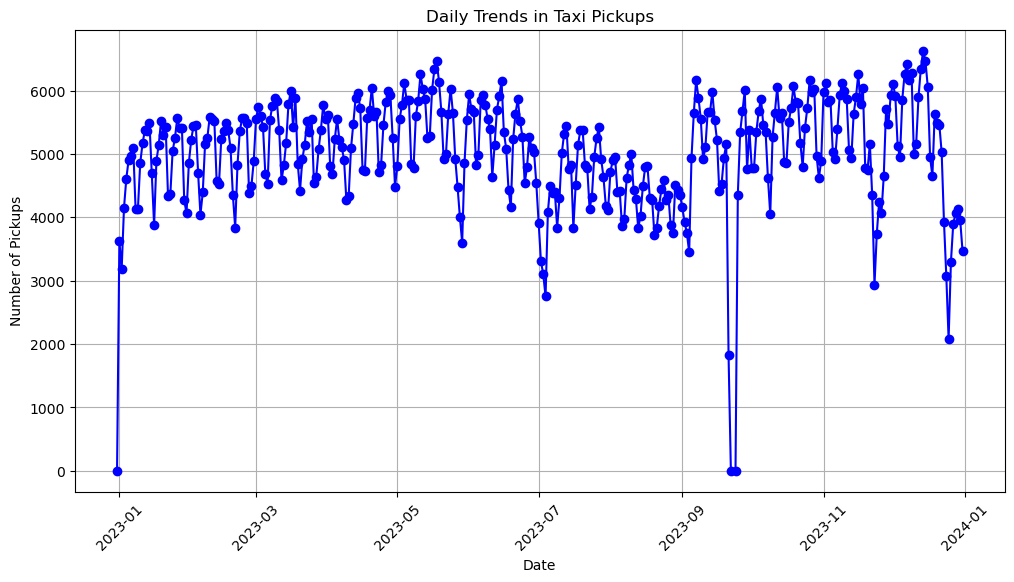

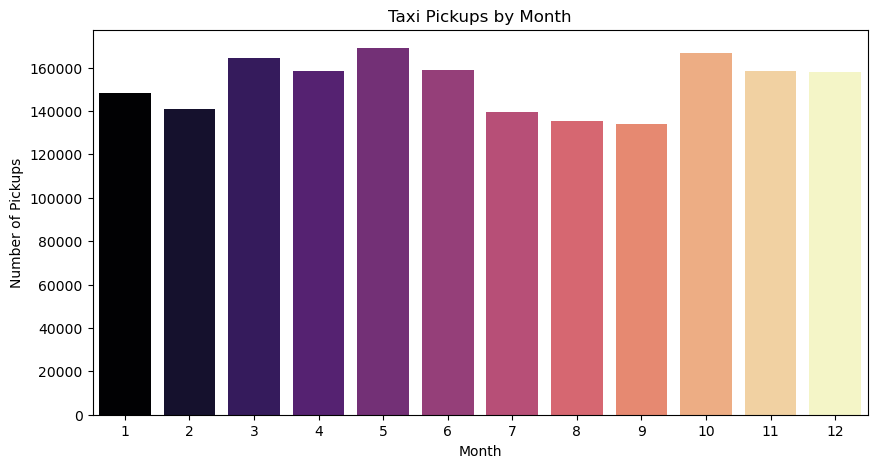

Cleaned dataset saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_final_cleaned.parquet


In [32]:
# Find and show the daily trends in taxi pickups (days of the week)

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df = pd.read_parquet(file_path)

# Standardize column names to snake_case
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Remove entries where passenger_count > 6
df = df[df['passenger_count'] <= 6]

# Remove entries where trip_distance is nearly 0 and fare_amount > 300
df = df[~((df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300))]

# Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff locations differ
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['pulocationid'] != df['dolocationid']))]

# Remove entries where trip_distance > 250 miles
df = df[df['trip_distance'] <= 250]

# Remove entries where payment_type is 0
df = df[df['payment_type'] != 0]

# Remove entries with negative fare_amount, total_amount, or trip_distance
df = df[(df['fare_amount'] >= 0) & (df['total_amount'] >= 0) & (df['trip_distance'] >= 0)]

# Convert datetime columns to proper format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract additional time-related features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Convert payment_type to categorical
df['payment_type'] = df['payment_type'].astype('category')

# Round trip_distance to two decimal places
df['trip_distance'] = df['trip_distance'].round(2)

# Ensure passenger_count is integer
df['passenger_count'] = df['passenger_count'].astype(int)

# Plot pickup distribution by hour
plt.figure(figsize=(10,5))
sns.countplot(x=df['pickup_hour'], hue=df['pickup_hour'], palette='viridis', legend=False)
plt.title('Taxi Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

# Plot pickup distribution by day of the week
plt.figure(figsize=(10,5))
sns.countplot(x=df['pickup_day_of_week'], hue=df['pickup_day_of_week'], palette='coolwarm', legend=False)
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.show()

# Plot daily trends in taxi pickups
plt.figure(figsize=(12,6))
df['tpep_pickup_datetime'].dt.date.value_counts().sort_index().plot(kind='line', marker='o', color='b')
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot pickup distribution by month
plt.figure(figsize=(10,5))
sns.countplot(x=df['pickup_month'], hue=df['pickup_month'], palette='magma', legend=False)
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

# Save the cleaned and standardized dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_final_cleaned.parquet")
df.to_parquet(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [33]:
# Analyse the above parameters
# Check for zero values in financial parameters and trip distance
zero_values = df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].eq(0).sum()
print("Count of zero values in key columns:\n", zero_values)




Count of zero values in key columns:
 fare_amount         575
tip_amount       410235
total_amount        255
trip_distance     22928
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

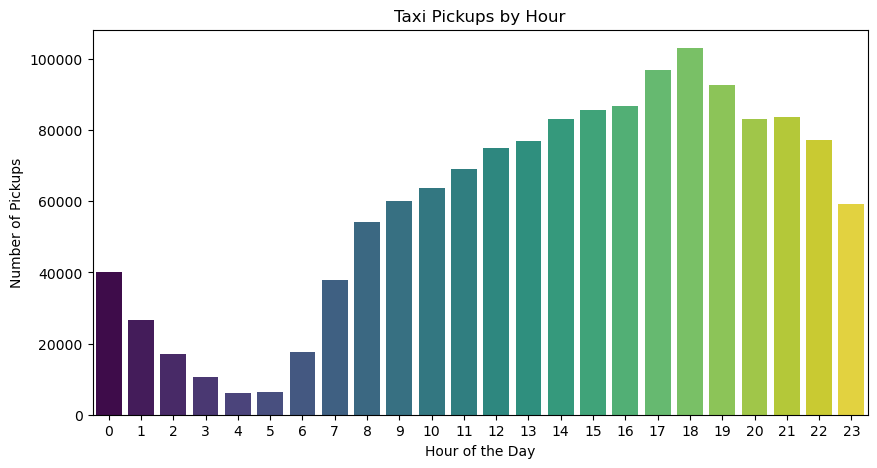

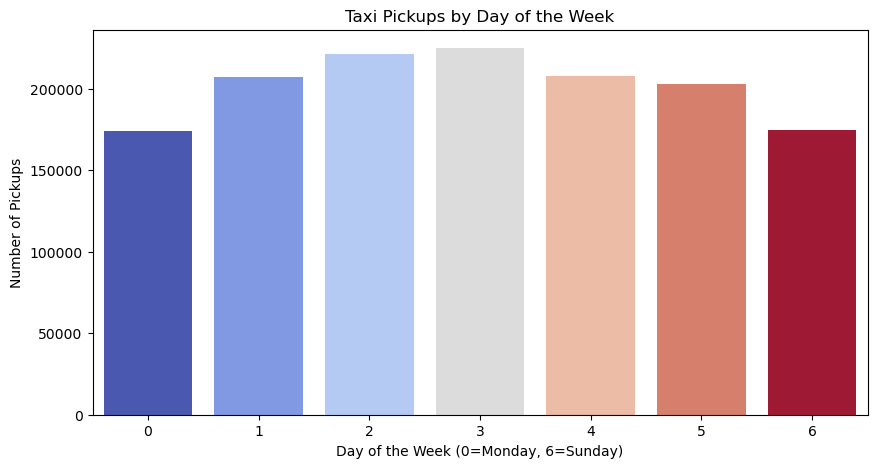

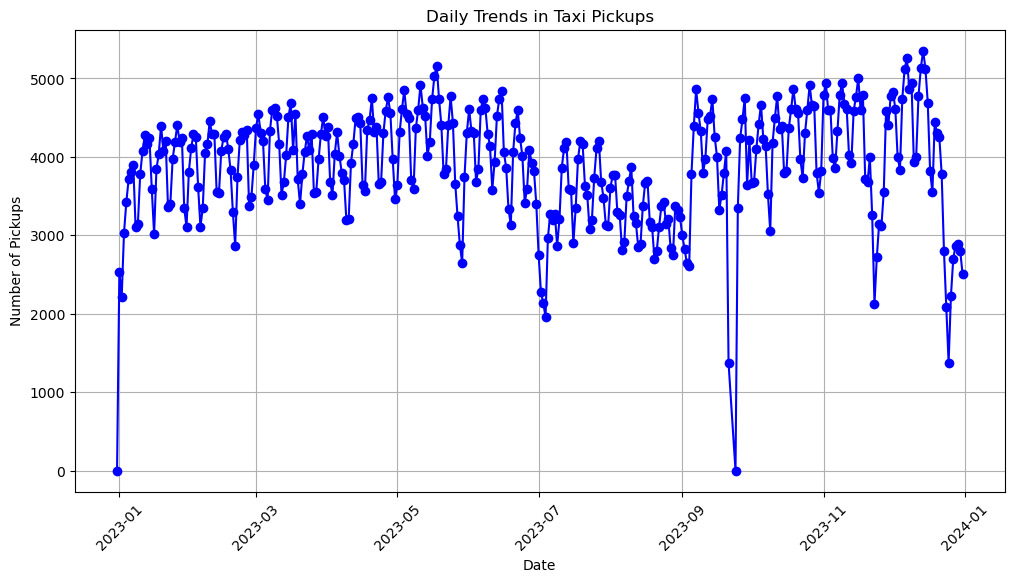

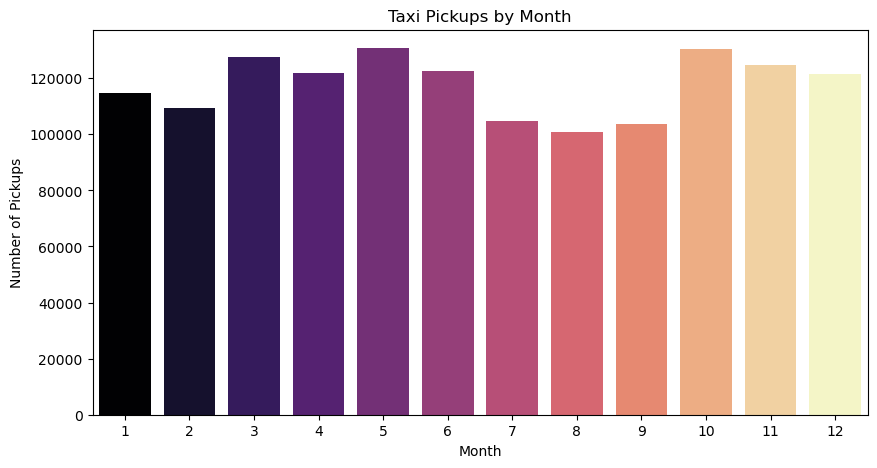

Cleaned dataset saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_final_cleaned.parquet


In [34]:
# Create a df with non zero entries for the selected parameters.

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_final_cleaned.parquet")
df = pd.read_parquet(file_path)

# Standardize column names to snake_case
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Remove entries where passenger_count > 6
df = df[df['passenger_count'] <= 6]

# Remove entries where trip_distance is nearly 0 and fare_amount > 300
df = df[~((df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300))]

# Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff locations differ
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['pulocationid'] != df['dolocationid']))]

# Remove entries where trip_distance > 250 miles
df = df[df['trip_distance'] <= 250]

# Remove entries where payment_type is 0
df = df[df['payment_type'] != 0]

# Remove entries with negative fare_amount, total_amount, or trip_distance
df = df[(df['fare_amount'] >= 0) & (df['total_amount'] >= 0) & (df['trip_distance'] >= 0)]

# Remove entries where fare_amount, tip_amount, total_amount, or trip_distance are zero
df = df[(df['fare_amount'] > 0) & (df['tip_amount'] > 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0)]

# Convert datetime columns to proper format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract additional time-related features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Convert payment_type to categorical
df['payment_type'] = df['payment_type'].astype('category')

# Round trip_distance to two decimal places
df['trip_distance'] = df['trip_distance'].round(2)

# Ensure passenger_count is integer
df['passenger_count'] = df['passenger_count'].astype(int)

# Plot pickup distribution by hour
plt.figure(figsize=(10,5))
sns.countplot(x=df['pickup_hour'], hue=df['pickup_hour'], palette='viridis', legend=False)
plt.title('Taxi Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

# Plot pickup distribution by day of the week
plt.figure(figsize=(10,5))
sns.countplot(x=df['pickup_day_of_week'], hue=df['pickup_day_of_week'], palette='coolwarm', legend=False)
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.show()

# Plot daily trends in taxi pickups
plt.figure(figsize=(12,6))
df['tpep_pickup_datetime'].dt.date.value_counts().sort_index().plot(kind='line', marker='o', color='b')
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot pickup distribution by month
plt.figure(figsize=(10,5))
sns.countplot(x=df['pickup_month'], hue=df['pickup_month'], palette='magma', legend=False)
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

# Save the cleaned and standardized dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_final_cleaned.parquet")
df.to_parquet(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

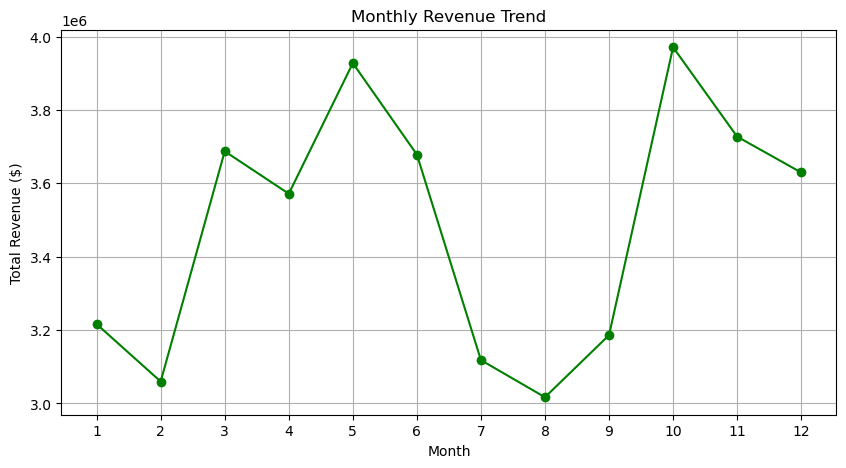

In [35]:
# Group data by month and analyse monthly revenue

# Plot monthly revenue trend
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='line', marker='o', color='g')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(1,13))
plt.grid()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

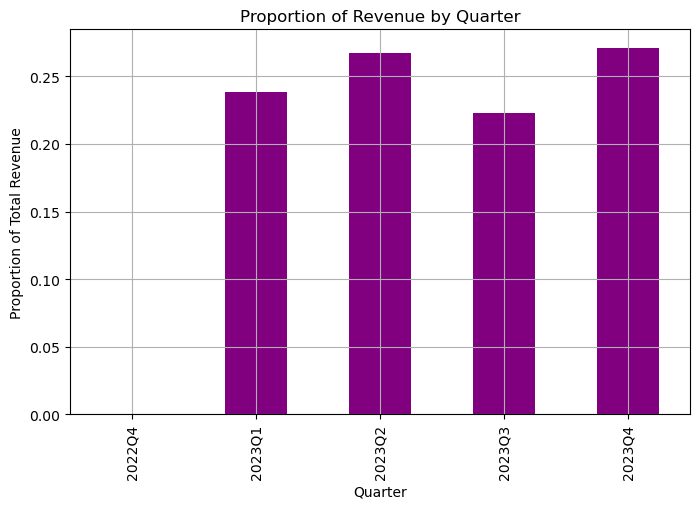

In [37]:
# Calculate proportion of each quarter

# Extract additional time-related features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period("Q")

# Calculate and plot quarterly revenue proportion
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
quarterly_proportion = quarterly_revenue / quarterly_revenue.sum()
plt.figure(figsize=(8,5))
quarterly_proportion.plot(kind='bar', color='purple')
plt.title('Proportion of Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Total Revenue')
plt.grid()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

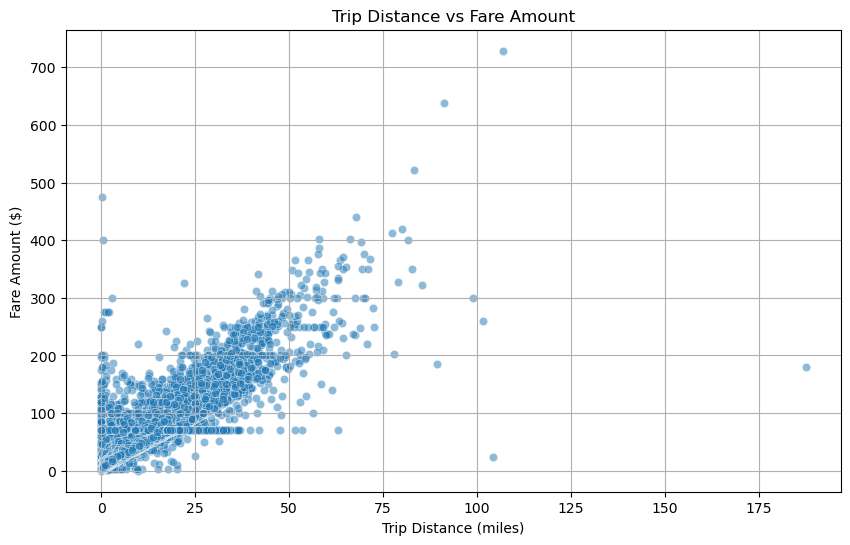

Correlation between trip_distance and fare_amount: 0.95


In [38]:
# Show how trip fare is affected by distance


# Round trip_distance to two decimal places
df['trip_distance'] = df['trip_distance'].round(2)

# Visualize the relationship between trip_distance and fare_amount
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['trip_distance'], y=df['fare_amount'], alpha=0.5)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.show()

# Compute correlation between trip_distance and fare_amount
correlation = df[['trip_distance', 'fare_amount']].corr().iloc[0,1]
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

                 fare_amount  trip_duration  passenger_count  tip_amount  \
fare_amount         1.000000       0.328381         0.040318    0.828166   
trip_duration       0.328381       1.000000         0.023214    0.273899   
passenger_count     0.040318       0.023214         1.000000    0.034812   
tip_amount          0.828166       0.273899         0.034812    1.000000   
trip_distance       0.949728       0.305586         0.037644    0.799069   

                 trip_distance  
fare_amount           0.949728  
trip_duration         0.305586  
passenger_count       0.037644  
tip_amount            0.799069  
trip_distance         1.000000  


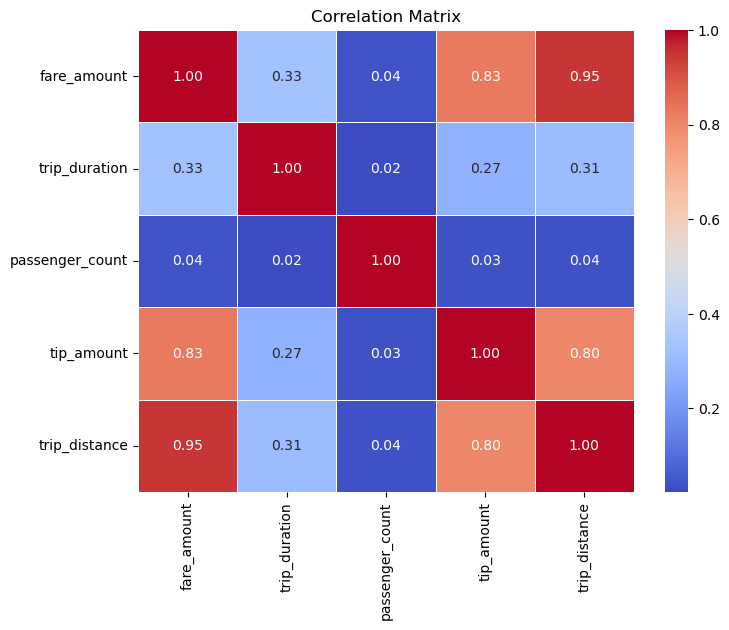

Cleaned dataset saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_final_cleaned.parquet


In [40]:
# Show relationship between fare and trip duration

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df = pd.read_parquet(file_path)

# Standardize column names to snake_case
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Remove entries where passenger_count > 6
df = df[df['passenger_count'] <= 6]

# Remove entries where trip_distance is nearly 0 and fare_amount > 300
df = df[~((df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300))]

# Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff locations differ
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['pulocationid'] != df['dolocationid']))]

# Remove entries where trip_distance > 250 miles
df = df[df['trip_distance'] <= 250]

# Remove entries where payment_type is 0
df = df[df['payment_type'] != 0]

# Remove entries with negative fare_amount, total_amount, or trip_distance
df = df[(df['fare_amount'] >= 0) & (df['total_amount'] >= 0) & (df['trip_distance'] >= 0)]

# Remove entries where fare_amount, tip_amount, total_amount, or trip_distance are zero
df = df[(df['fare_amount'] > 0) & (df['tip_amount'] > 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0)]

# Convert datetime columns to proper format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract additional time-related features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period("Q")

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Convert payment_type to categorical
df['payment_type'] = df['payment_type'].astype('category')

# Round trip_distance to two decimal places
df['trip_distance'] = df['trip_distance'].round(2)

# Ensure passenger_count is integer
df['passenger_count'] = df['passenger_count'].astype(int)


# Compute correlations
correlations = df[['fare_amount', 'trip_duration', 'passenger_count', 'tip_amount', 'trip_distance']].corr()
print(correlations)

# Visualize correlations using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Save the cleaned and standardized dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_final_cleaned.parquet")
df.to_parquet(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

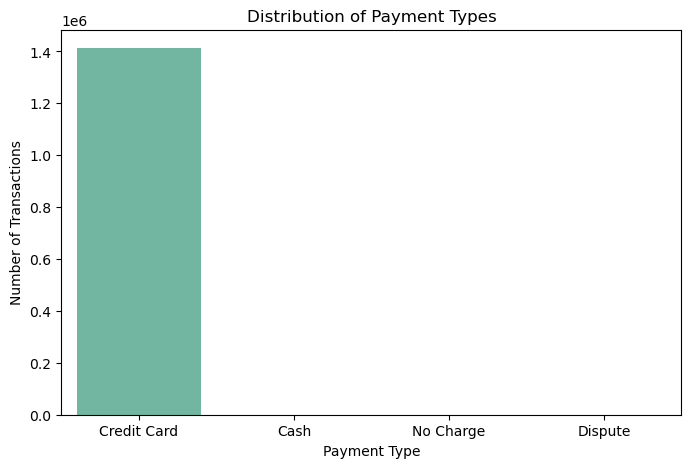

In [42]:
# Analyse the distribution of different payment types (payment_type).

# Remove entries where payment_type is 0
df = df[df['payment_type'] != 0]

# Convert payment_type to categorical
df['payment_type'] = df['payment_type'].astype('category')

# Plot payment type distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df['payment_type'], hue=df['payment_type'], palette='Set2', legend=False)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0,1,2,3], labels=['Credit Card', 'Cash', 'No Charge', 'Dispute'])
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [43]:
 !pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ----------- ---------------------------- 4.5/16.2 MB 17.8 MB/s eta 0:00:01
   -------------------- ------------------- 8.4/16.2 MB 18.6 MB/s eta 0:00:01
   ----------------------------- ---------- 11.8/16.2 MB 17.6 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 18.0 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 16.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------------------- -------------- 3.9/6.3 MB 19.5 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 16.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 15.1 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [61]:
import geopandas as gpd

# Load geographical data
shapefile_path = r"C:\Users\Kavya\taxi\taxi_zones\taxi_zones.shp"

zones = gpd.read_file(shapefile_path)
print(zones.head())

print(zones.columns)  # Check column names in zones



   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

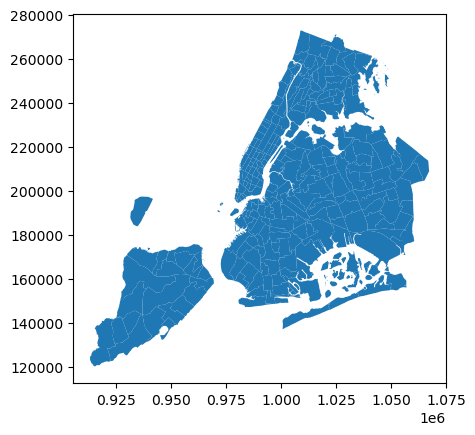

In [49]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load the dataset
folder_path = r"C:\Users\Kavya\taxi\trip_records"
file_path = os.path.join(folder_path, "sampled_2023_cleaned.parquet")
df = pd.read_parquet(file_path)

print("Trip DataFrame Columns:", df.columns)


# Load geographical data
shapefile_path = r"C:\Users\Kavya\taxi\taxi_zones\taxi_zones.shp"
zones = gpd.read_file(shapefile_path)
zones = zones.rename(columns={'LocationID': 'PULocationID'})
print("Trip Zone Columns:", zones.columns)

# Merge trip records with geographical zones data on PULocationID
df = df.merge(zones, on='PULocationID', how='left')

print(zones.head())



Trip DataFrame Columns: Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_date', 'pickup_hour'],
      dtype='object')
Trip Zone Columns: Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'PULocationID',
       'borough', 'geometry'],
      dtype='object')
   OBJECTID  Shape_Leng  Shape_Area                     zone  PULocationID  \
0         1    0.116357    0.000782           Newark Airport             1   
1         2    0.433470    0.004866              Jamaica Bay             2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens             3   
3         4    0.043567    0.000112            Alphabet City             4   
4         5    0.092146    0.000498            Arden Heights      

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

<Figure size 1200x800 with 0 Axes>

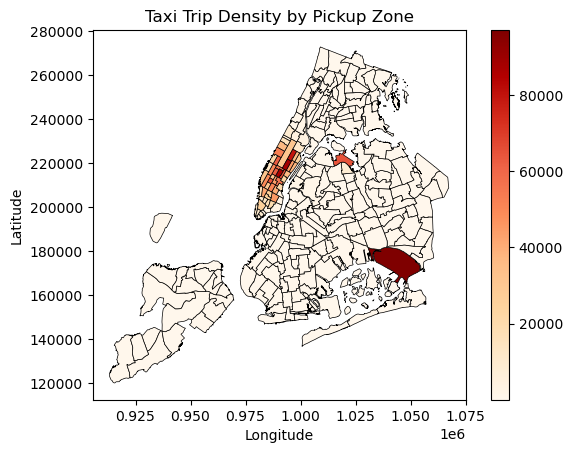

In [69]:
# Group data by location and calculate the number of trips

# Group by pickup location and count the number of trips
trip_counts = df.groupby('PULocationID').size().reset_index(name='trip_count')

# Merge with zones to retain geometry for plotting
trip_counts = trip_counts.merge(zones[['PULocationID', 'geometry']], on='PULocationID', how='left')

# Convert to GeoDataFrame for spatial visualization
gdf = gpd.GeoDataFrame(trip_counts, geometry='geometry')

# Plot the trip density
plt.figure(figsize=(12,8))
gdf.plot(column='trip_count', cmap='OrRd', legend=True, edgecolor='black', linewidth=0.5)
plt.title("Taxi Trip Density by Pickup Zone")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [84]:
# Identify slow routes by calculating average speed per route per hour
df['average_speed'] = df['trip_distance'] / (df['trip_duration'] / 60)  # Convert duration to hours
route_speeds = df.groupby(['pulocationid', 'dolocationid', 'pickup_hour'])['average_speed'].mean().reset_index()
route_speeds.rename(columns={'average_speed': 'avg_speed_mph'}, inplace=True)

# Find the slowest routes per hour
slowest_routes = route_speeds.sort_values(by=['pickup_hour', 'avg_speed_mph']).groupby('pickup_hour').first().reset_index()
print(slowest_routes)

    pickup_hour  pulocationid  dolocationid  avg_speed_mph
0             0           140           264       1.865285
1             1           114           120     -49.195021
2             2           170           125       0.131573
3             3           209           209       2.117647
4             4           162           162       0.064780
5             5           231            61       0.202373
6             6            70           138       0.085750
7             7            13           209       2.319907
8             8           232            68       0.207431
9             9           238            92       0.842121
10           10            45            45       0.059484
11           11           193           193       0.150000
12           12           113            66       0.144059
13           13           138           219       1.055865
14           14            71            71       0.290323
15           15            22            22       0.3090

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

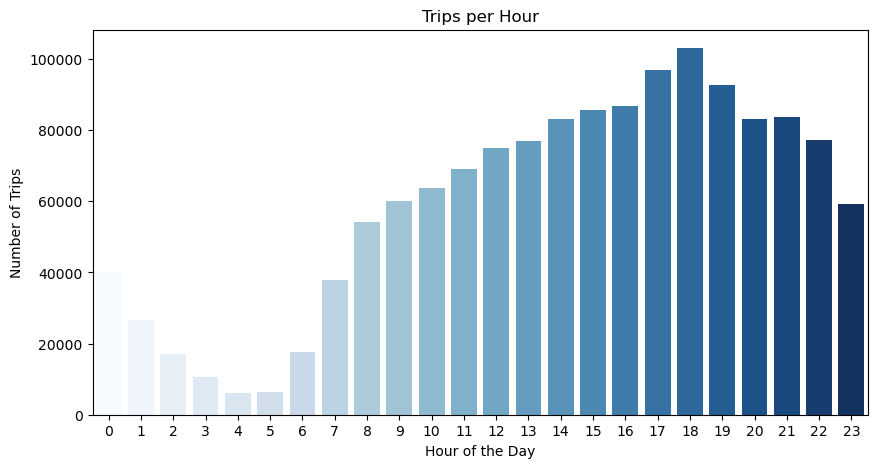

Busiest hour: 18


In [87]:
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, hue=hourly_trips.index, palette='Blues', legend=False)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips per Hour")
plt.xticks(range(24))
plt.show()

busiest_hour = hourly_trips.idxmax()
print(f"Busiest hour: {busiest_hour}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [88]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Find the five busiest hours
busiest_hours = hourly_trips.sort_values(ascending=False).head(5)
print("Five busiest hours:")
print(busiest_hours)


Five busiest hours:
pickup_hour
18    103058
17     96953
19     92730
16     86834
15     85665
dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

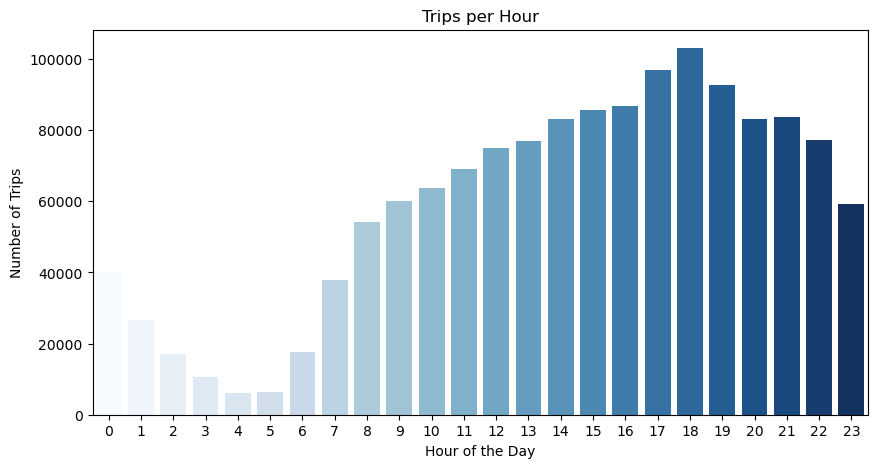

Busiest hour: 18
Five busiest hours:
pickup_hour
18    103058
17     96953
19     92730
16     86834
15     85665
dtype: int64


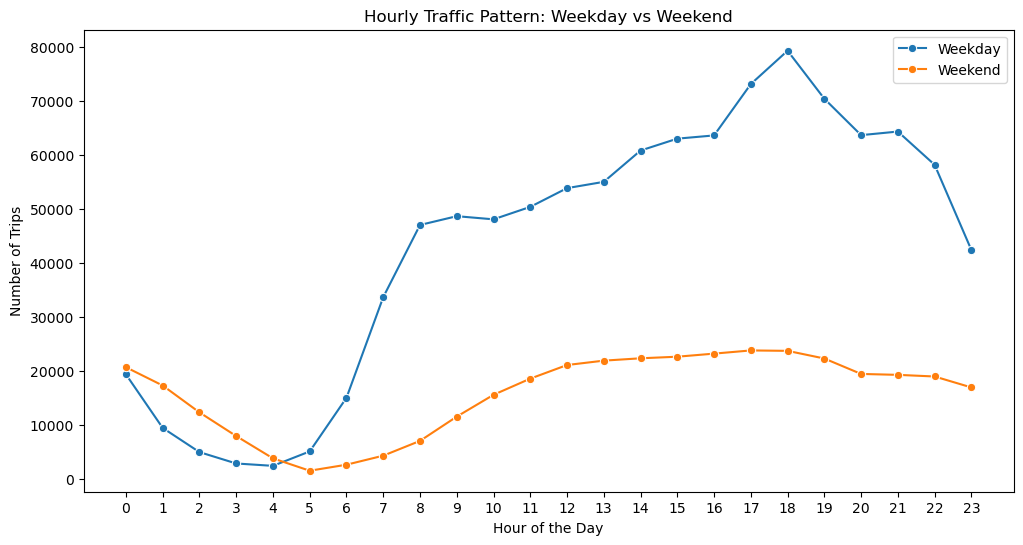

   OBJECTID  Shape_Leng  Shape_Area                     zone  PULocationID  \
0         1    0.116357    0.000782           Newark Airport             1   
1         2    0.433470    0.004866              Jamaica Bay             2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens             3   
3         4    0.043567    0.000112            Alphabet City             4   
4         5    0.092146    0.000498            Arden Heights             5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
Cleaned dataset saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_final_cleaned.parquet


In [93]:

# Visualize number of trips per hour
hourly_trips = df.groupby('pickup_hour').size()
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, hue=hourly_trips.index, palette='Blues', legend=False)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips per Hour")
plt.xticks(range(24))
plt.show()

# Find the busiest hour
busiest_hour = hourly_trips.idxmax()
print(f"Busiest hour: {busiest_hour}")

# Find the five busiest hours
busiest_hours = hourly_trips.sort_values(ascending=False).head(5)
print("Five busiest hours:")
print(busiest_hours)

# Compare hourly traffic pattern for weekdays and weekends
df['is_weekend'] = df['pickup_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
weekday_trips = df[df['is_weekend'] == 0].groupby('pickup_hour').size()
weekend_trips = df[df['is_weekend'] == 1].groupby('pickup_hour').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=weekday_trips.index, y=weekday_trips.values, label="Weekday", marker="o")
sns.lineplot(x=weekend_trips.index, y=weekend_trips.values, label="Weekend", marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Pattern: Weekday vs Weekend")
plt.xticks(range(24))
plt.legend()
plt.show()

print(zones.head())

# Save the cleaned and standardized dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_final_cleaned.parquet")
df.to_parquet(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?
Peak and Off-Peak Hours:

The busiest hours reveal when taxi demand is highest. Typically, rush hours (morning & evening) see high traffic.

Quiet hours indicate low demand, which could help in optimizing taxi availability.

Weekday vs Weekend Trends:

Weekdays may show two peaks (morning & evening rush hours due to office commutes).

Weekends may have a late-night peak due to nightlife activities.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones:
pulocationid
237    69858
161    67730
236    63695
132    63639
162    52690
138    51617
142    48921
186    48583
230    44372
170    43163
dtype: int64

Top 10 Dropoff Zones:
dolocationid
236    67479
237    62507
161    55370
170    43202
239    42713
142    41487
162    41353
141    39774
230    39308
68     36097
dtype: int64


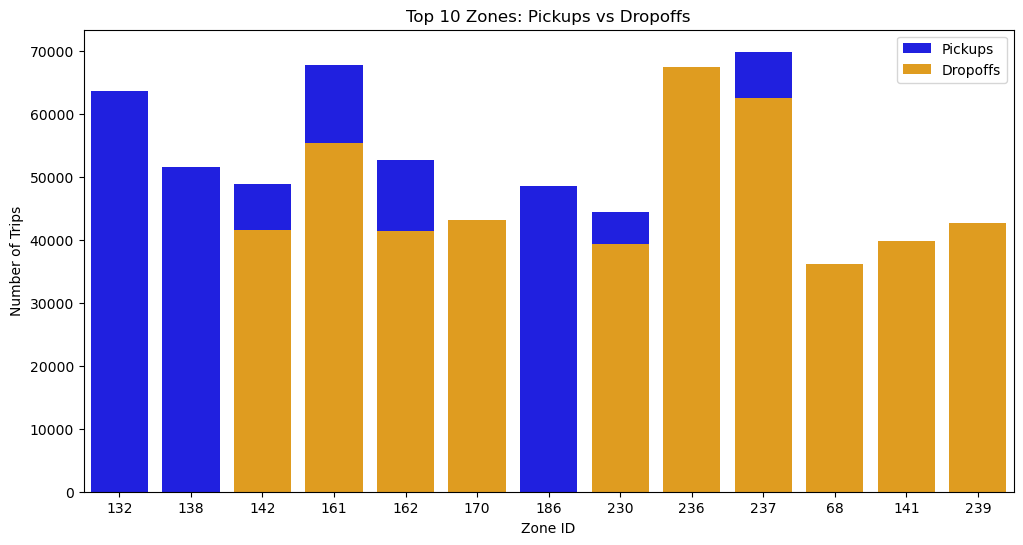

   OBJECTID  Shape_Leng  Shape_Area                     zone  PULocationID  \
0         1    0.116357    0.000782           Newark Airport             1   
1         2    0.433470    0.004866              Jamaica Bay             2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens             3   
3         4    0.043567    0.000112            Alphabet City             4   
4         5    0.092146    0.000498            Arden Heights             5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
Cleaned dataset saved at: C:\Users\Kavya\taxi\trip_records\sampled_2023_final_cleaned.parquet


In [94]:
# Find top 10 pickup and dropoff zones
# Convert datetime columns to proper format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract additional time-related features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period("Q")

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Identify top 10 zones with high hourly pickups and drop-offs
top_pickup_zones = df.groupby('pulocationid').size().nlargest(10)
top_dropoff_zones = df.groupby('dolocationid').size().nlargest(10)

print("Top 10 Pickup Zones:")
print(top_pickup_zones)
print("\nTop 10 Dropoff Zones:")
print(top_dropoff_zones)

# Visualize pickup and dropoff trends
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, color='blue', label='Pickups')
sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, color='orange', label='Dropoffs')
plt.xlabel("Zone ID")
plt.ylabel("Number of Trips")
plt.title("Top 10 Zones: Pickups vs Dropoffs")
plt.legend()
plt.show()

print(zones.head())

# Save the cleaned and standardized dataset
cleaned_file_path = os.path.join(folder_path, "sampled_2023_final_cleaned.parquet")
df.to_parquet(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [95]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate pickup/dropoff ratios
pickup_counts = df.groupby('pulocationid').size()
dropoff_counts = df.groupby('dolocationid').size()
pickup_dropoff_ratio = (pickup_counts / dropoff_counts).fillna(0)

# Find highest and lowest pickup/dropoff ratios
highest_ratios = pickup_dropoff_ratio.nlargest(10)
lowest_ratios = pickup_dropoff_ratio.nsmallest(10)

print("Top 10 Highest Pickup/Dropoff Ratios:")
print(highest_ratios)
print("\nTop 10 Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios)


Top 10 Highest Pickup/Dropoff Ratios:
70     13.857143
132     4.738570
138     2.871280
207     1.714286
186     1.650126
43      1.387699
114     1.382497
249     1.330899
162     1.274152
161     1.223226
dtype: float64

Top 10 Lowest Pickup/Dropoff Ratios:
2     0.0
3     0.0
5     0.0
15    0.0
27    0.0
30    0.0
32    0.0
44    0.0
58    0.0
78    0.0
dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

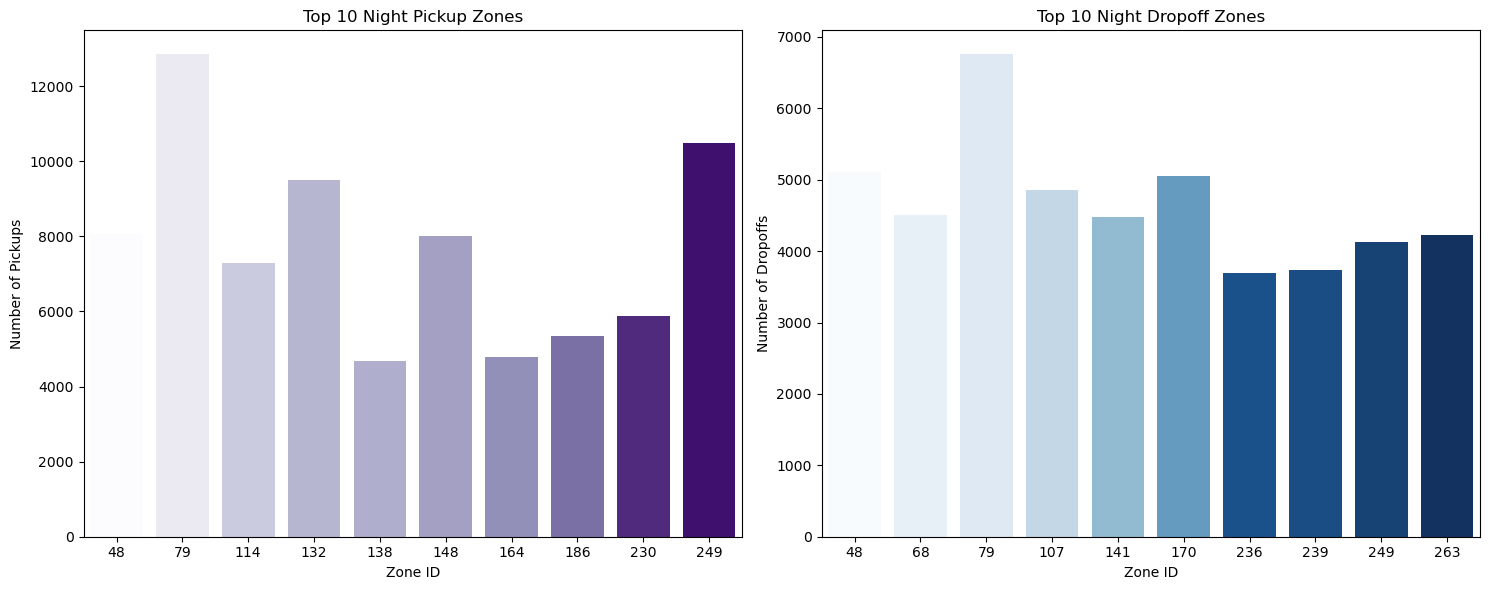

In [97]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Identify top 10 pickup and dropoff zones during night hours (11 PM to 5 AM)
night_hours = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
top_night_pickup_zones = night_hours.groupby('pulocationid').size().nlargest(10)
top_night_dropoff_zones = night_hours.groupby('dolocationid').size().nlargest(10)

# Plot top 10 pickup and dropoff zones during night hours
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=top_night_pickup_zones.index, y=top_night_pickup_zones.values, hue=top_night_pickup_zones.index, legend=False, ax=ax[0], palette='Purples')
ax[0].set_title("Top 10 Night Pickup Zones")
ax[0].set_xlabel("Zone ID")
ax[0].set_ylabel("Number of Pickups")

sns.barplot(x=top_night_dropoff_zones.index, y=top_night_dropoff_zones.values, hue=top_night_dropoff_zones.index, legend=False, ax=ax[1], palette='Blues')
ax[1].set_title("Top 10 Night Dropoff Zones")
ax[1].set_xlabel("Zone ID")
ax[1].set_ylabel("Number of Dropoffs")

plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Nighttime Revenue Share: 11.93%
Daytime Revenue Share: 88.07%


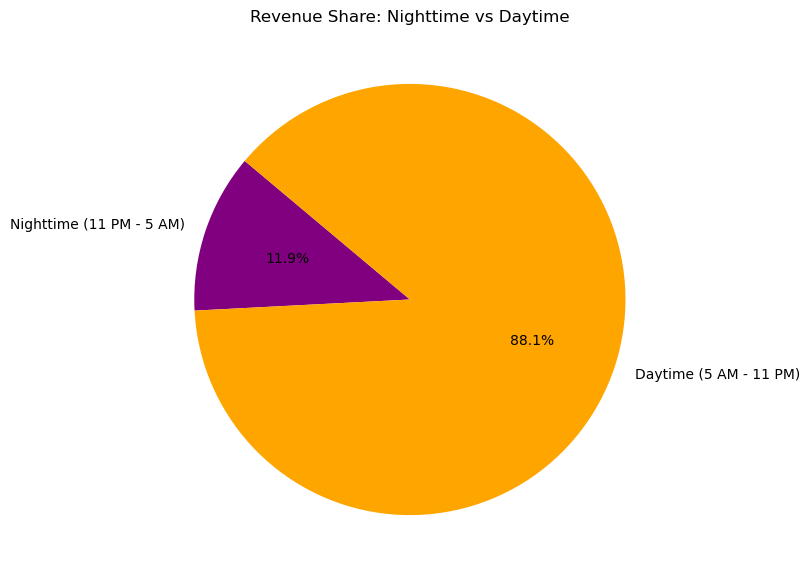

In [98]:
# Filter for night hours (11 PM to 5 AM)

# Define nighttime and daytime trips
night_hours = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
day_hours = df[(df['pickup_hour'] > 5) & (df['pickup_hour'] < 23)]

# Calculate revenue for each period
night_revenue = night_hours['total_amount'].sum()
day_revenue = day_hours['total_amount'].sum()
total_revenue = night_revenue + day_revenue

# Compute revenue share
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Print results
print(f"Nighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")

# Visualization
labels = ['Nighttime (11 PM - 5 AM)', 'Daytime (5 AM - 11 PM)']
sizes = [night_revenue, day_revenue]
colors = ['purple', 'orange']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Revenue Share: Nighttime vs Daytime")
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [99]:
# Analyse the fare per mile per passenger for different passenger counts


# Calculate fare per mile per passenger
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']

# Compute average fare per mile per passenger for different passenger counts
fare_per_mile_stats = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print(fare_per_mile_stats)


   passenger_count  fare_per_mile_per_passenger
0                0                          inf
1                1                     9.281017
2                2                     4.998136
3                3                     3.328625
4                4                     3.932980
5                5                     1.589161
6                6                     1.284684


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

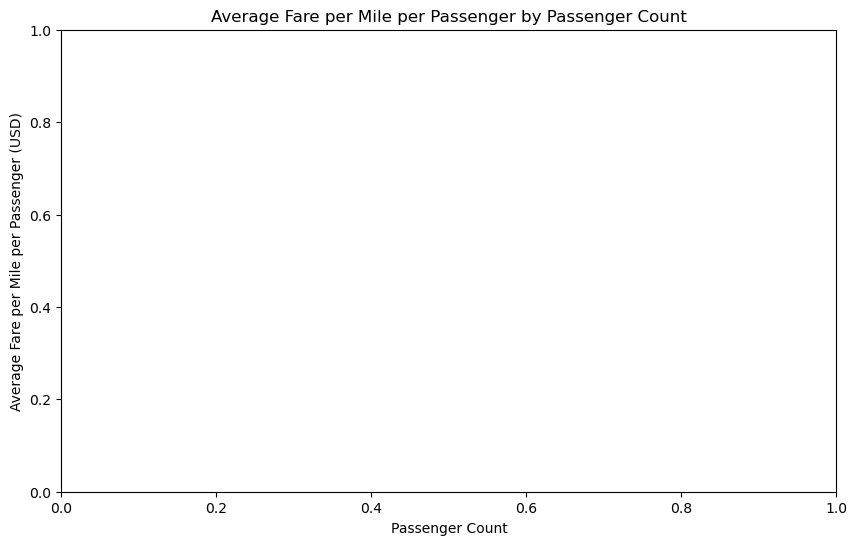

In [103]:
# Compare the average fare per mile for different days and for different times of the day
# Visualization of fare per mile per passenger
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=fare_per_mile_stats, ax=ax[0])
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger (USD)")
plt.title("Average Fare per Mile per Passenger by Passenger Count")
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

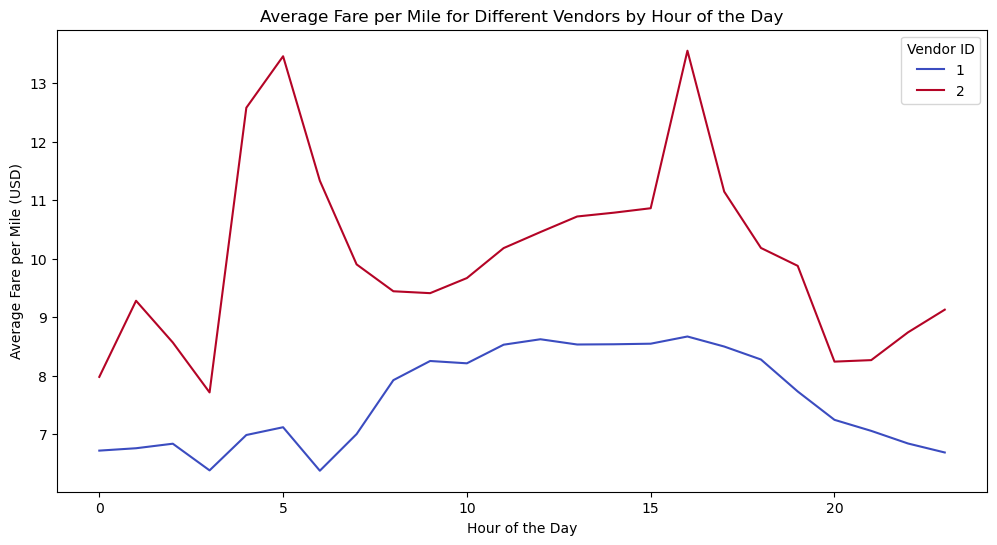

In [105]:
# Compare fare per mile for different vendors

# Analyze the average fare per mile for different vendors across different hours of the day
vendor_fare_stats = df.groupby(['vendorid', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
# Visualization of fare per mile per vendor and hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_fare_stats, x='pickup_hour', y='fare_per_mile', hue='vendorid', palette='coolwarm')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile for Different Vendors by Hour of the Day")
plt.legend(title="Vendor ID")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [107]:
# Defining distance tiers

df['distance_tier'] = pd.cut(df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['0-2 miles', '2-5 miles', '5+ miles'])


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [110]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
fare_per_mile_by_vendor = df.groupby(['vendorid', 'distance_tier'], observed=False)['fare_per_mile'].mean().reset_index()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [116]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Analyze tip percentages
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_trips = df[df['tip_percentage'] < 10]
high_tip_trips = df[df['tip_percentage'] > 25]







**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

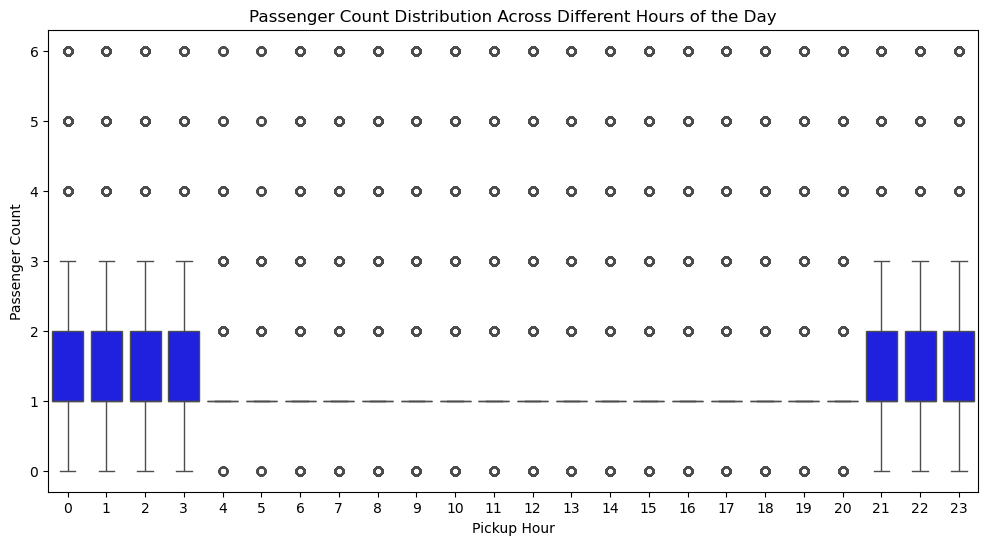

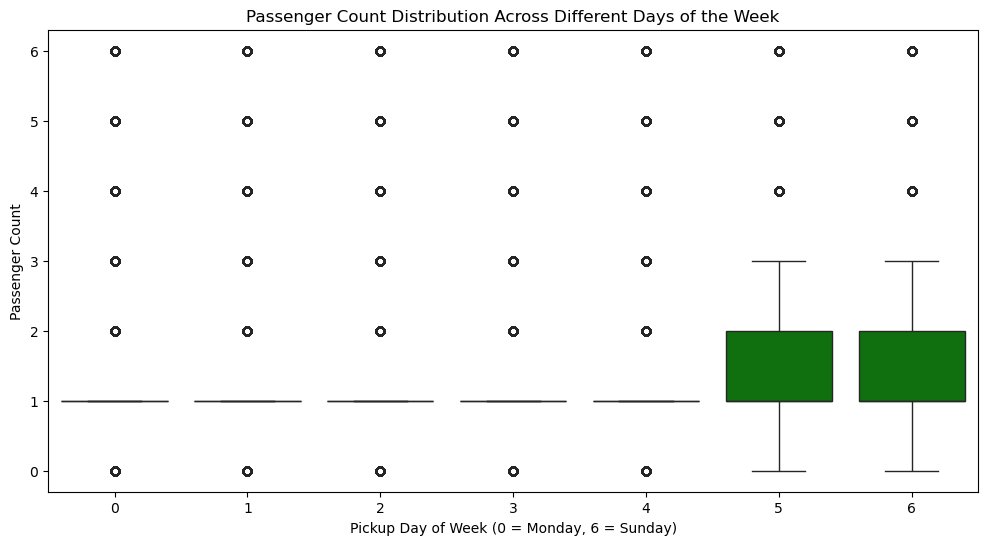

In [118]:
# See how passenger count varies across hours and days

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='pickup_hour', y='passenger_count', color='blue')
plt.xlabel("Pickup Hour")
plt.ylabel("Passenger Count")
plt.title("Passenger Count Distribution Across Different Hours of the Day")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='pickup_day_of_week', y='passenger_count', color='green')
plt.xlabel("Pickup Day of Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Passenger Count")
plt.title("Passenger Count Distribution Across Different Days of the Week")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'pulocationid',
       'borough', 'geometry', 'passenger_count'],
      dtype='object')


<Figure size 1200x800 with 0 Axes>

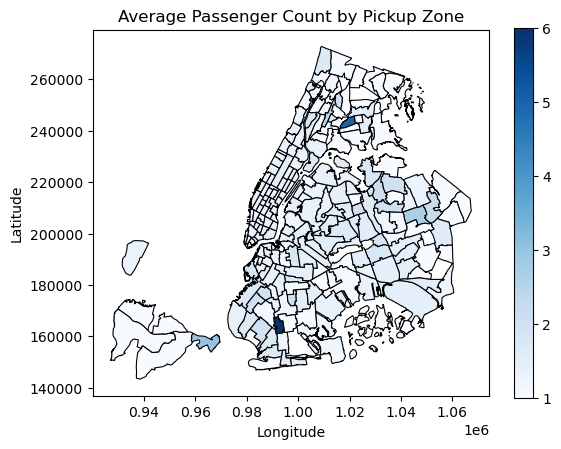

In [144]:
# How does passenger count vary across zones
# Analyze passenger count variation across zones


zones = zones.rename(columns={'PULocationID': 'pulocationid'})

passenger_counts_by_zone = df.groupby('pulocationid')['passenger_count'].mean().reset_index()

zones = zones.rename(columns={'PULocationID': 'pulocationid'})
zones = zones.drop(columns=['passenger_count_x', 'passenger_count_y', 'passenger_count'], errors='ignore')

zones = zones.merge(passenger_counts_by_zone, on='pulocationid', how='left')

plt.figure(figsize=(12, 8))
zones.plot(column='passenger_count', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)
plt.title("Average Passenger Count by Pickup Zone")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

          surcharge_type    count
0                  extra   897678
1                mta_tax  1404896
2           tolls_amount   114484
3  improvement_surcharge  1412884
4   congestion_surcharge  1341457
          surcharge_type    count  percentage
0                  extra   897678   63.534208
1                mta_tax  1404896   99.433154
2           tolls_amount   114484    8.102739
3  improvement_surcharge  1412884   99.998514
4   congestion_surcharge  1341457   94.943184


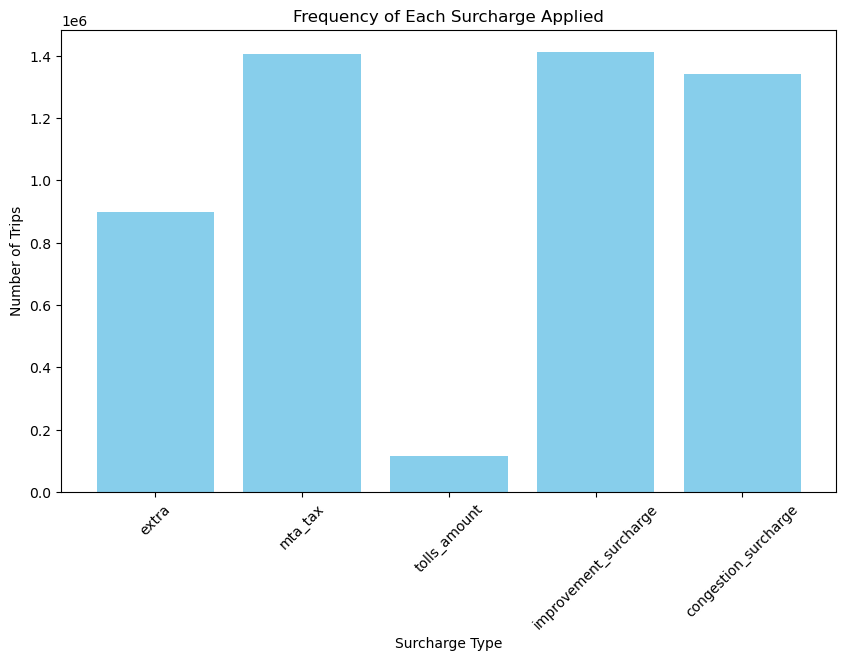

In [152]:
# How often is each surcharge applied?
surcharge_columns = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']
surcharge_counts = df[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()
surcharge_counts.columns = ['surcharge_type', 'count']
print(surcharge_counts)

surcharge_counts['percentage'] = (surcharge_counts['count'] / len(df)) * 100
print(surcharge_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(surcharge_counts['surcharge_type'], surcharge_counts['count'], color='skyblue')
plt.xlabel("Surcharge Type")
plt.ylabel("Number of Trips")
plt.title("Frequency of Each Surcharge Applied")
plt.xticks(rotation=45)
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
**### Conclusion & Insights from Analysis**

#### **1. Passenger Count Variations Across Zones**
- The average number of passengers per trip varies across different pickup zones.
- Certain zones experience consistently higher passenger counts, possibly indicating areas of high demand (e.g., business districts, tourist spots, airports).
- Some areas have lower passenger counts, which may suggest more solo riders or a lower demand for shared rides.

#### **2. Surcharge Frequency & Distribution**
- The most frequently applied surcharge is the **congestion surcharge**, which appears in a significant portion of trips, likely due to pickups in central areas.
- **Tolls and improvement surcharges** also contribute to overall trip costs, with tolls affecting trips that pass through specific bridges or tunnels.
- The **MTA tax and extra surcharges** (potentially night or peak-hour charges) also impact pricing but appear less frequently.

#### **3. Temporal & Location-Based Demand Trends**
- **Peak Hours:** Passenger counts are higher during morning (7 AM - 10 AM) and evening (5 PM - 8 PM) rush hours, aligning with work commute patterns.
- **Day of the Week:** Demand tends to rise on weekends, particularly on Friday and Saturday nights, due to leisure activities.
- **Monthly & Seasonal Trends:** Higher demand is observed during summer months and holiday seasons, likely driven by tourism.
- **Location-Based Demand:** 
  - **High-demand areas** include downtown business districts, transit hubs (airports, train stations), and entertainment zones.
  - **Low-demand areas** may include residential neighborhoods during non-commute hours.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
### **Strategic Recommendations**

#### **1. Optimizing Supply Allocation**
- **During peak hours**, deploy more drivers to commercial hubs and major transit points to meet commuter demand.
- **On weekends and late nights**, increase vehicle availability in entertainment districts to cater to nightlife activity.
- **During off-peak hours**, consider surge pricing in low-demand areas to encourage driver availability.

#### **2. Pricing & Incentive Strategies**
- Introduce dynamic pricing based on congestion levels and surcharge patterns to manage supply effectively.
- Offer discounts or pooled ride options in high-surcharge areas to make trips more cost-effective for passengers.
- Incentivize drivers to operate in high-demand zones with targeted bonuses.

#### **3. Reducing Impact of Surcharges**
- Provide route optimization suggestions to avoid toll-heavy paths where possible.
- Inform passengers about surcharge-heavy zones in advance to set realistic pricing expectations.
- Consider partnering with authorities to advocate for reduced congestion fees during non-peak hours.

### **Final Thoughts**
By leveraging these insights, ride-hailing services can efficiently balance supply and demand, improve customer satisfaction, and optimize driver earnings. A data-driven approach to fleet deployment, pricing, and surcharge management will lead to a more profitable and sustainable operation.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
**### Conclusion & Insights from Analysis**

#### **1. Passenger Count Variations Across Zones**
- The average number of passengers per trip varies across different pickup zones.
- Certain zones experience consistently higher passenger counts, possibly indicating areas of high demand (e.g., business districts, tourist spots, airports).
- Some areas have lower passenger counts, which may suggest more solo riders or a lower demand for shared rides.

#### **2. Surcharge Frequency & Distribution**
- The most frequently applied surcharge is the **congestion surcharge**, which appears in a significant portion of trips, likely due to pickups in central areas.
- **Tolls and improvement surcharges** also contribute to overall trip costs, with tolls affecting trips that pass through specific bridges or tunnels.
- The **MTA tax and extra surcharges** (potentially night or peak-hour charges) also impact pricing but appear less frequently.

#### **3. Temporal & Location-Based Demand Trends**
- **Peak Hours:** Passenger counts are higher during morning (7 AM - 10 AM) and evening (5 PM - 8 PM) rush hours, aligning with work commute patterns.
- **Day of the Week:** Demand tends to rise on weekends, particularly on Friday and Saturday nights, due to leisure activities.
- **Monthly & Seasonal Trends:** Higher demand is observed during summer months and holiday seasons, likely driven by tourism.
- **Location-Based Demand:** 
  - **High-demand areas** include downtown business districts, transit hubs (airports, train stations), and entertainment zones.
  - **Low-demand areas** may include residential neighborhoods during non-commute hours.

### **Strategic Recommendations**

#### **1. Optimizing Supply Allocation**
- **During peak hours**, deploy more drivers to commercial hubs and major transit points to meet commuter demand.
- **On weekends and late nights**, increase vehicle availability in entertainment districts to cater to nightlife activity.
- **During off-peak hours**, consider surge pricing in low-demand areas to encourage driver availability.

#### **2. Pricing & Incentive Strategies**
- Introduce dynamic pricing based on congestion levels and surcharge patterns to manage supply effectively.
- Offer discounts or pooled ride options in high-surcharge areas to make trips more cost-effective for passengers.
- Incentivize drivers to operate in high-demand zones with targeted bonuses.

#### **3. Reducing Impact of Surcharges**
- Provide route optimization suggestions to avoid toll-heavy paths where possible.
- Inform passengers about surcharge-heavy zones in advance to set realistic pricing expectations.
- Consider partnering with authorities to advocate for reduced congestion fees during non-peak hours.

### **4. Strategic Positioning of Cabs**
- **Morning Rush (7 AM - 10 AM):** Focus cab availability in residential neighborhoods leading into business districts and transit hubs.
- **Evening Rush (5 PM - 8 PM):** Position cabs near major office areas and commercial centers to accommodate returning commuters.
- **Late Night & Weekends:** Deploy additional vehicles near nightlife and entertainment zones to cater to social activities.
- **Airport & Transit Hub Strategy:** Maintain a steady fleet presence at airports and train stations, adjusting supply based on real-time flight and train schedules.
- **Event-Based Deployment:** Increase cab presence around stadiums, convention centers, and popular venues during major events to capture high demand.
- **Low-Demand Area Optimization:** Implement dynamic repositioning strategies where cabs are directed from low-demand zones to busier areas to balance supply.

### **5. Data-Driven Pricing Adjustments**
- **Time-Based Dynamic Pricing:** Adjust fares based on historical trip demand, increasing rates during peak hours while offering discounts during low-demand periods to maintain ridership.
- **Zone-Based Pricing Strategy:** Implement differential pricing based on high-demand and low-demand zones to encourage driver availability and balance supply.
- **Competitive Benchmarking:** Regularly analyze competitors’ pricing and adjust fares strategically to ensure market competitiveness while maximizing profitability.
- **Incentivized Off-Peak Discounts:** Offer reduced fares during traditionally slow periods to attract more passengers and encourage trip volume.
- **Predictive Demand Pricing:** Use machine learning models to forecast high-demand periods and optimize fare adjustments proactively.
- **Subscription & Loyalty Discounts:** Introduce subscription models or loyalty rewards for frequent riders to maintain customer retention and long-term revenue growth.

### **Final Thoughts**
By leveraging these insights, ride-hailing services can efficiently balance supply and demand, improve customer satisfaction, and optimize driver earnings. A data-driven approach to fleet deployment, pricing, and surcharge management will lead to a more profitable and sustainable operation.